## <center>Visualização de dados para <ins><b>Hours Guru</b></ins><center>

<p>A idéia é treinar um modelo para identificação do possível numero de horas que serão trabalhados para cada projeto.</p>

> <p>Para isso ele vai considerar o numero de horas contratadas para já saber o que é esperado daquele projeto</p>
> <p>Ele vai usar os apontamentos de horas para ter o valor real do que é esperado para o projeto</p>
> <p>Com o agrupamento mensal a idéia é mensurar o que provávelmente vai ser gasto em horas no próximo mês</p>
> <p>Ao Final de cada mês, quando tiver os valores concretos definidos, comparamos com o previsto para definir a acuracia e treinar o modelo novamente.<p>

## Fazendo os imports necessários

**pandas** para manipulação de dados

**numpy** para operações numéricas

**matplotlib** para visualização gráfica dos dados

**seaborn** embelezamento dos gráficos

**Sklearn** para o aprendizado do modelo

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Constantes

In [5]:
NAME_FILE = '2025-01_to_2025-04.csv'
DATASET_FULL_NAME = f"../data/preprocess/{NAME_FILE}"

<h1>Leitura do dataset</h1>

<p>Schema</p>

| **Campo**       | **Tipo de Dado**      |
|-----------------|-----------------------|
| user            | object                |
| project         | object                |
| period          | object                |
| worked_hours    | float64               |
| contracted_hours| float64               |
| remaining_hours | float64               |

In [7]:
training_dataset_df = pd.read_csv(DATASET_FULL_NAME)

training_dataset_df.head()

,user,project,period,worked_hours,contracted_hours,remaining_hours
0,670eb0fb90b0e73dcc6bcd09,66fc64d1abb3a15f1721b428,2025-01,79.19,100.0,20.81
1,6744db1e3f15431655dd6f28,670fef69d08c20561620eff9,2025-01,0.52,15.0,14.48
2,673b6dfa1f7f6f6182fea6c4,670fef69d08c20561620eff9,2025-01,15.08,15.0,-0.08
3,659da1d883e8651e8c3cfd0b,66fc64d1abb3a15f1721b428,2025-01,3.50,100.0,96.50
4,6705597174a7fa193aa06b29,65ba6f93dc7a9a37f56fcba0,2025-01,7.25,20.0,12.75


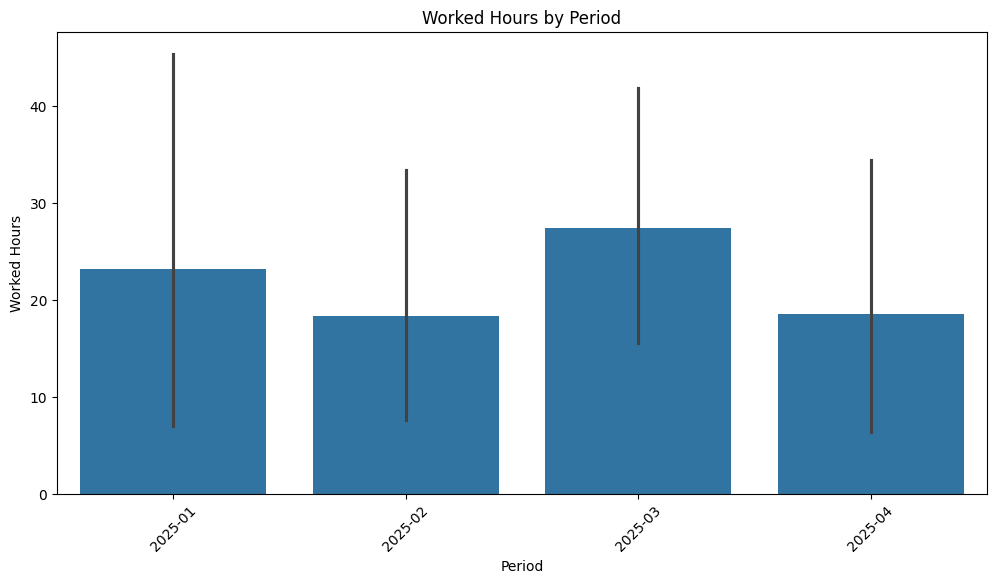

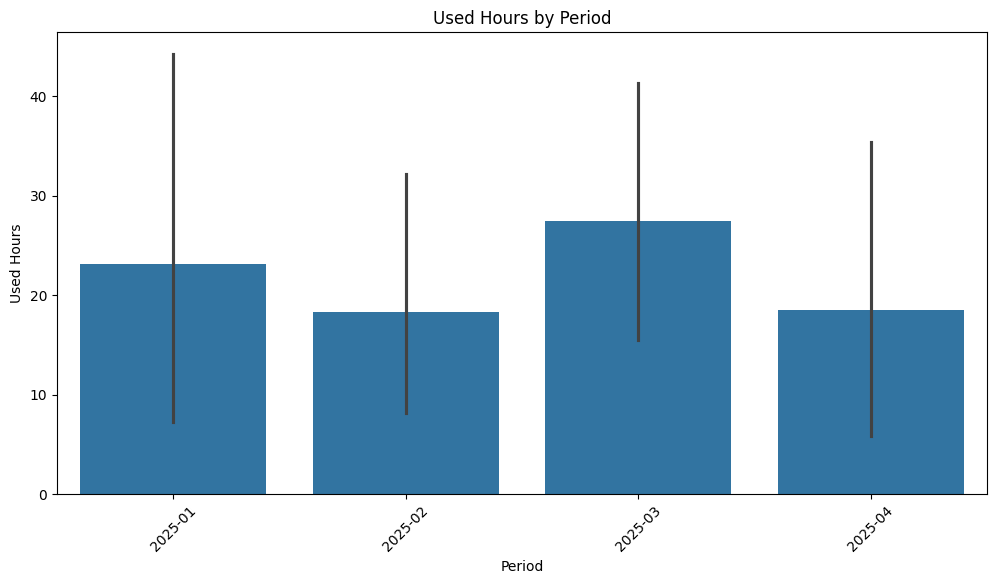

In [17]:
# Plot for worked_hours by period
plt.figure(figsize=(12, 6))
sns.barplot(data=training_dataset_df, x='period', y='worked_hours')
plt.title('Worked Hours by Period')
plt.xlabel('Period')
plt.ylabel('Worked Hours')
plt.xticks(rotation=45)
plt.show()

training_dataset_df['used_hours'] = training_dataset_df['contracted_hours'] - training_dataset_df['remaining_hours']

plt.figure(figsize=(12, 6))
sns.barplot(data=training_dataset_df, x='period', y='used_hours')
plt.title('Used Hours by Period')
plt.xlabel('Period')
plt.ylabel('Used Hours')
plt.xticks(rotation=45)
plt.show()

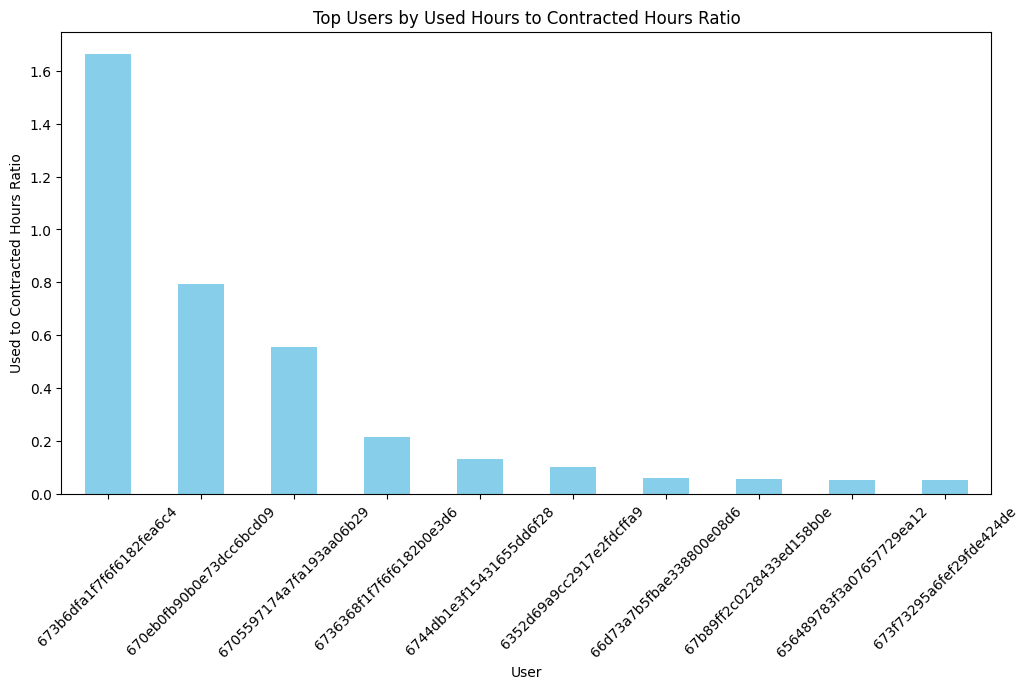

In [19]:
training_dataset_df['used_to_contracted_ratio'] = training_dataset_df['used_hours'] / training_dataset_df['contracted_hours']

user_ratios = training_dataset_df.groupby('user')['used_to_contracted_ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
user_ratios.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Users by Used Hours to Contracted Hours Ratio')
plt.xlabel('User')
plt.ylabel('Used to Contracted Hours Ratio')
plt.xticks(rotation=45)
plt.show()